In [1]:
'''
Importing necessary libraries for testing
'''

import numpy as np
import pandas as pd
from sklearn import datasets

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn import tree

df = pd.read_csv('./modules/csv/ham_and_phish.csv')
df

,File,Access,Account,Alert,Click,Confidential,Fradulent,Indefinite,Information,Notification,...,Provide,Request,Update,Upgrade,Verify,Verb %,Noun %,Adjective %,Adverb %,Result
0,phishing_set_1\0.eml,0,3,0,1,0,0,0,4,0,...,0,0,4,0,1,23.66,49.46,19.35,4.30,1
1,phishing_set_1\1.eml,0,2,0,1,0,0,0,2,0,...,0,1,0,0,0,22.50,52.50,20.00,3.75,1
2,phishing_set_1\10.eml,0,7,0,1,0,0,1,3,0,...,2,0,0,0,0,21.74,49.57,19.13,3.48,1
3,phishing_set_1\100.eml,0,2,0,1,0,0,0,3,1,...,0,0,4,0,0,19.35,52.69,22.58,4.30,1
4,phishing_set_1\101.eml,1,11,4,4,0,2,0,6,1,...,1,3,0,0,3,17.21,64.65,14.42,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,ham_set_3\ham2546.eml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25.00,50.00,0.00,0.00,0
7014,ham_set_3\ham2547.eml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25.00,50.00,0.00,0.00,0
7015,ham_set_3\ham2548.eml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25.00,50.00,0.00,0.00,0
7016,ham_set_3\ham2549.eml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25.00,50.00,0.00,0.00,0


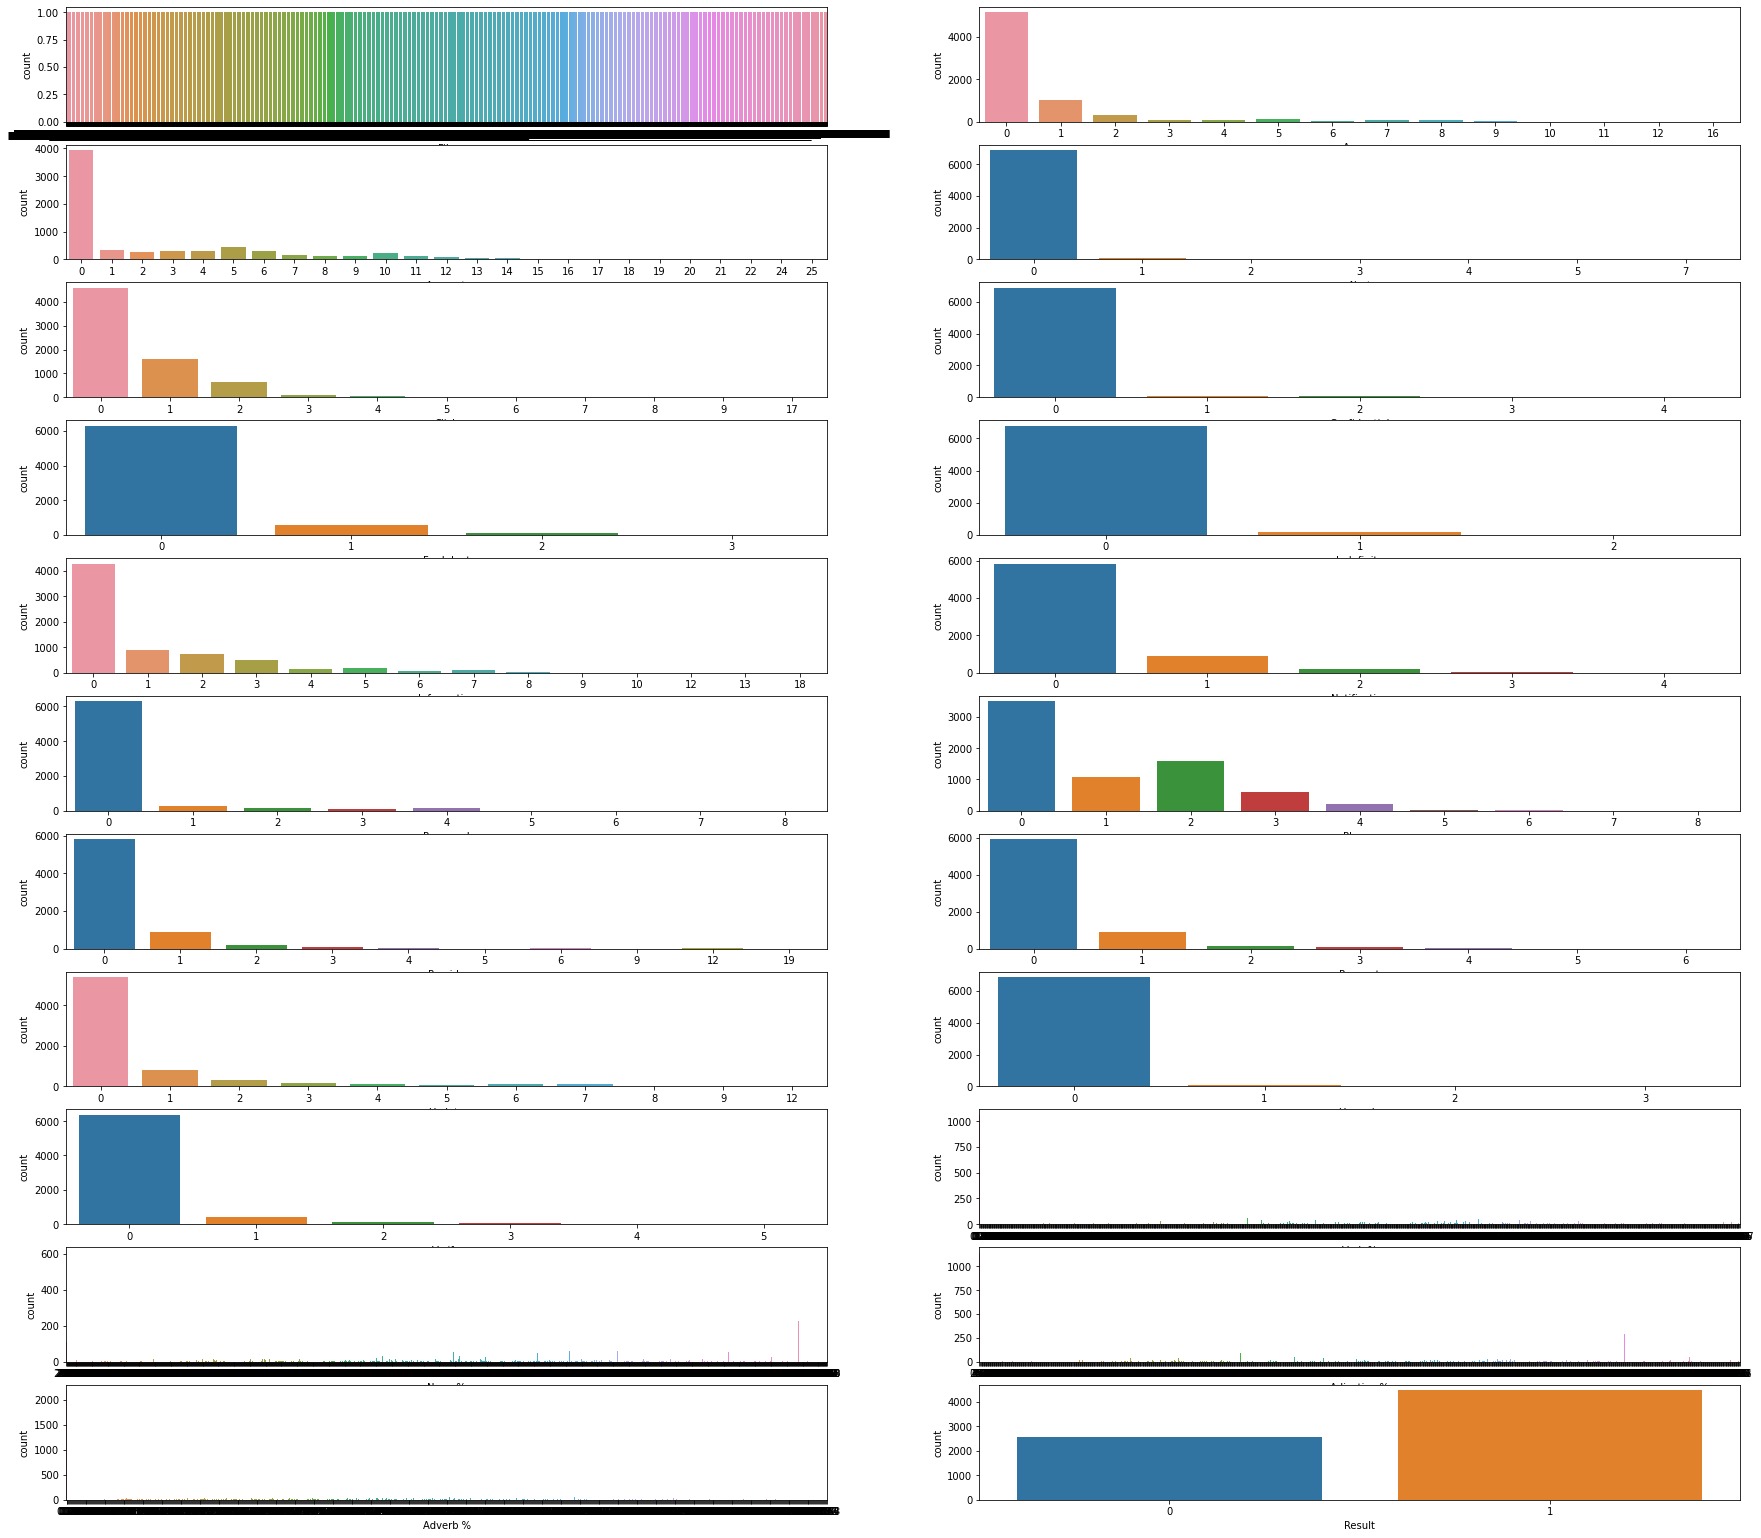

In [2]:
'''
This cell displays the different features and their quantities
'''

i = 1
plt.figure(figsize = (30,30))
for feature in df:
    plt.subplot(12,2,i)
    sns.countplot(x = feature ,  data = df)
    i +=1

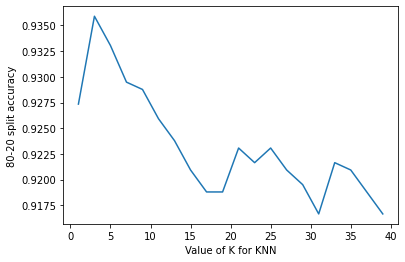

In [4]:
'''
Performing K-Nearest Neighbors Test
'''

data = df.drop(columns=['File','Result'])
answer = df['Result']

X_train, X_test, Y_train, Y_test = train_test_split(data, answer, test_size=0.2)

k_scores = []
k_range=range(1,40,2)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    k_scores.append(accuracy)
    
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('80-20 split accuracy')
plt.show()



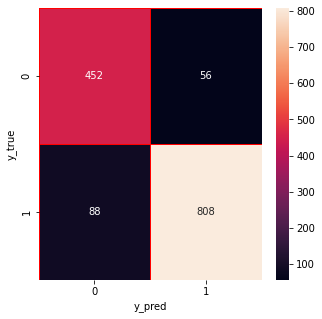

In [ ]:
cm = metrics.confusion_matrix(Y_test, y_pred)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

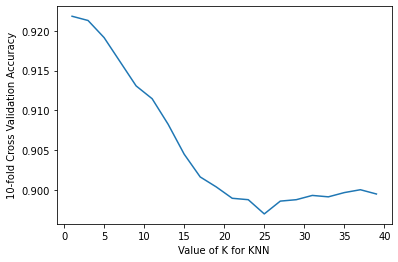

In [ ]:
'''
Performing K Nearest Neighbors with Cross Validation
'''

k_scores = []
k_range=range(1,40,2)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_prediction = cross_val_predict(knn,X_train, Y_train,cv=10)
    cv_scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    k_scores.append(np.mean(cv_scores))

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('10-fold Cross Validation Accuracy')
plt.show()

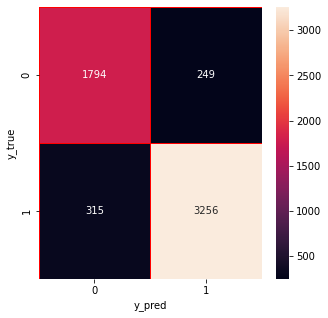

In [ ]:
conf_mat = metrics.confusion_matrix(Y_train, y_prediction)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(conf_mat,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

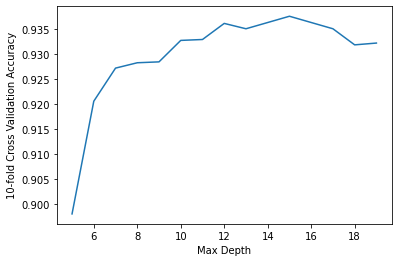

In [ ]:
'''
Performing Decision Tree Test
'''

dt_scores = []
types = ["entropy", "gini"]
depth_range = range(5,20,1)

for i in depth_range:
    dtModel = DecisionTreeClassifier(criterion="entropy", max_depth = i, random_state=1)
    dtModel.fit(X_train, Y_train)

    dtPred = dtModel.predict(X_test)
    y_prediction = cross_val_predict(dtModel,X_train, Y_train,cv=10)
    cv_scores = cross_val_score(dtModel, X_train, Y_train, cv=10, scoring='accuracy')
    dt_scores.append(np.mean(cv_scores))

plt.plot(depth_range,dt_scores)
plt.xlabel('Max Depth')
plt.ylabel('10-fold Cross Validation Accuracy')
plt.show()

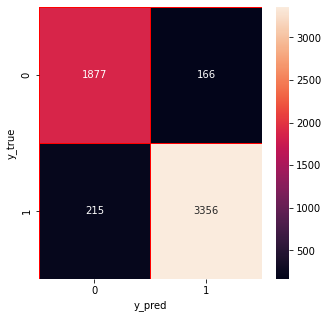

In [ ]:
conf_mat = metrics.confusion_matrix(Y_train, y_prediction)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(conf_mat,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
'''
Creating Tree Example for Paper
'''

dtModel = DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state=1)
dtModel.fit(X_train, Y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtModel,
                    feature_names=data.columns,
                    class_names=["0","1"],
                    filled=True)

In [7]:
'''
Performing Support Vector Machine Analysis

Graph Displays SVM scores with cross validation
'''

'''
kernels = ['linear','poly', 'rbf', 'sigmoid']

svm_scores = []
for i in kernels:
    svmModel = svm.SVC(kernel=i)

    print("passed model creation")
    svmModel.fit(X_train,Y_train)
    print("past fitting")
    yPred = svmModel.predict(X_test)

    #print("Kernel Type: ", i)
    #print("Accuracy: ",metrics.accuracy_score(Y_test, yPred), "\n")
    y_prediction = cross_val_predict(svmModel,X_train, Y_train,cv=10)
    print("passed prediction")
    cv_scores = cross_val_score(svmModel, X_train, Y_train, cv=10, scoring='accuracy')
    svm_scores.append(np.mean(cv_scores))

plt.plot(kernels,svm_scores)
plt.xlabel('Type of Kernel')
plt.ylabel('10-fold Cross Validation Accuracy')
plt.show()
'''

svmModel = svm.SVC(kernel="linear")

print("passed model creation")
svmModel.fit(X_train,Y_train)
print("past fitting")
yPred = svmModel.predict(X_test)

#print("Kernel Type: ", i)
#print("Accuracy: ",metrics.accuracy_score(Y_test, yPred), "\n")
y_prediction = cross_val_predict(svmModel,X_train, Y_train,cv=10)
print("passed prediction")
cv_scores = cross_val_score(svmModel, X_train, Y_train, cv=10, scoring='accuracy')
#svm_scores.append(np.mean(cv_scores))

passed model creation
past fitting
passed prediction


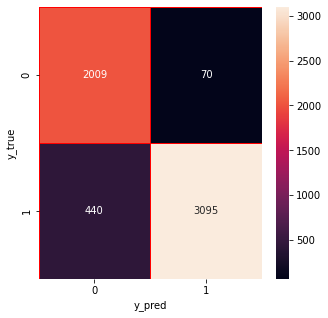

In [8]:
conf_mat = metrics.confusion_matrix(Y_train, y_prediction)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(conf_mat,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
'''
Performing Logistic Regression Analysis
'''

model = LogisticRegression()

model.fit(X_train, Y_train)

pred = model.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(Y_test, pred))

Accuracy:  0.905982905982906


c:\Users\imyug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
